<a href="https://colab.research.google.com/github/sakura-felicia/CBECI/blob/master/WienerProcesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

print(np.random.normal(0.652))

0.9808184067908599


In [ ]:
from scipy import stats
print(stats.norm.cdf(0.652))

0.7427994138010756


In [ ]:
def wiener_process(dt=0.1, x0 =0, n=1000):
  #Return a new array of given shape and type, filled with zeros.
  W = np.zeros(n+1) # stores the values of the wiener process


  #we create N+1 timesteps: t=0, 1, 2, 3 ... N

  t = np.linspace(x0, n, n+1)

  #we have to use cumulative sum: on every step the additional value is
  # drawn from a normal distribution with mean 0 and variance dt with n 
  #number of steps to be drawn
  W[1: n+1] = np.cumsum(np.random.normal(0, np.sqrt(dt), n))

  return t, W

 


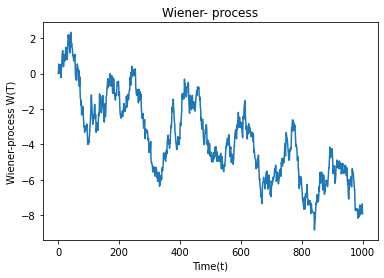

In [ ]:
def plot_process(t, W):
  plt.plot(t, W)
  plt.xlabel("Time(t)")
  plt.ylabel("Wiener-process W(T)")
  plt.title("Wiener- process")
  plt.show()

if __name__ == '__main__':
  time,data = wiener_process()
  plot_process(time, data)

In [ ]:
def simulate_geometric_random_walk(S0, T=2, N=1000, mu=0.1, sigma=0.05):
  dt = T/N
  t = np.linspace(0, T, N)
  W = np.random.standard_normal(size=N)
  W = np.cumsum(W) *np.sqrt(dt)
  X = (mu-0.5 * sigma **2) *t + sigma *W
  S = S0 * np.exp(X)
  return t, S

In [ ]:
def plot_simulation(t, S):
  plt.plot(t, S)
  plt.xlabel("Time(t)")
  plt.ylabel("Stock Price S(T)")
  plt.title("Geometric Brownian Motion")
  plt.show()

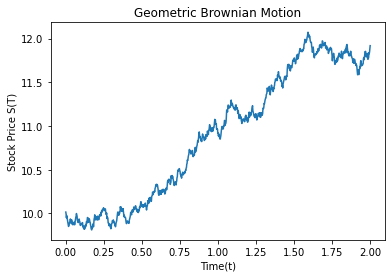

In [ ]:
if __name__ == "__main__":
  #at the beginning, the stock price is 10 dollars
  time, data = simulate_geometric_random_walk(10)
  plot_simulation(time, data)

In [ ]:
import math
from scipy import stats


In [ ]:
def black_scholes (K, S, r, sigma, T):
  d1 = ((math.log(S/K)) + (r+1/2 * sigma**2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  X = -r*(T)
  Call_option = S * stats.norm.cdf(d1) - K *np.exp(X)*stats.norm.cdf(d2)
  Put_option = -S*stats.norm.cdf(-d1) + K * np.exp(X)*stats.norm.cdf(-d2)
  return Call_option, Put_option
  

In [ ]:
def delta_hedging(K, S, r, sigma, T, number): #number refers to the nr of calls
   #how many stock shares do we have to short to maintain a delta neutral position
   d1 = ((math.log(S/K)) + (r+1/2 * sigma**2)*T)/(sigma*np.sqrt(T))
   delta = stats.norm.cdf(d1)
   nr_shares = delta * number
   return round(nr_shares)



In [ ]:
delta_hedging(105, 110, 0.04, 0.15, 1, 50)

37

In [ ]:
def PandL(K, S, r, sigma, T, number, S1, t):
  call_price_before = black_scholes (K, S, r, sigma, T)[0]
  call_price_now = black_scholes (K, S1, r, sigma, T-t/12)[0]
  nr_shares = delta_hedging(K, S, r, sigma, T, number)
  PandL = number*(call_price_now-call_price_before) - (S1-S)*nr_shares

  return PandL, call_price_before, call_price_now, nr_shares


In [ ]:
print(PandL(105, 110, 0.04, 0.15, 1, 50, 100, 3))

(-7.309616468419051, 11.880204253214117, 4.334011923845736, 37)


In [ ]:
black_scholes(100, 100, 0.05, 0.2, 1)
#r = risk free rate

(10.450583572185565, 5.573526022256971)

In [ ]:
#Monte Carlo simulations

class OptionPricing:
  def __init__ (self, S0, K, T, r, sigma, iterations):
    self.S0 = S0
    self.K = K
    self.T = T
    self.r = r
    self.sigma = sigma
    self.iterations = iterations

In [ ]:
class OptionPricing:
    
	def __init__(self,S0,E,T,rf,sigma,iterations):
		self.S0 = S0
		self.E = E
		self.T = T
		self.rf = rf
		self.sigma = sigma     
		self.iterations = iterations 
    
	def call_option_simulation(self):
		
		#we have 2 columns: first with 0s the second column will store the payoff
		#we need the first column of 0s: payoff function is max(0,S-E) for call option
		option_data = np.zeros([self.iterations, 2])
		
		#dimensions: 1 dimensional array with as many items as the itrations
		rand = np.random.normal(0, 1, [1, self.iterations])
		
		#equation for the S(t) stock price
		stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)
 
		#we need S-E because we have to calculate the max(S-E,0)
		option_data[:,1] = stock_price - self.E   
        
		#average for the Monte-Carlo method
		#np.amax() returns the max(0,S-E) according to the formula
		average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)
 
		#have to use the exp(-rT) discount factor
		return np.exp(-1.0*self.rf*self.T)*average
		
	def put_option_simulation(self):
	
		#we have 2 columns: first with 0s the second column will store the payoff
		#we need the first column of 0s: payoff function is max(0,E-S) for put option
		option_data = np.zeros([self.iterations, 2])
		
		#dimensions: 1 dimensional array with as many items as the itrations
		rand = np.random.normal(0, 1, [1, self.iterations])
		
		#equation for the S(t) stock price
		stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)
 
		#we need E-S because we have to calculate the max(E-S,0)
		option_data[:,1] = self.E - stock_price  
        
		#average for the Monte-Carlo method
		#np.amax() returns the max(0,E-S) according to the formula
		average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)
 
		#have to use the exp(-rT) discount factor
		return np.exp(-1.0*self.rf*self.T)*average

In [ ]:
if __name__ == "__main__":
	
	S0=110					#underlying stock price at t=0
	E=105				#strike price
	T = 1					#expiry
	rf = 0.04				#risk-free rate
	sigma=0.15				#volatility of the underlying stock
	iterations = 1000000	#number of iterations in the Monte-Carlo simulation	
	
	model = OptionPricing(S0,E,T,rf,sigma,iterations)
	print("Call option price with Monte-Carlo approach: ", model.call_option_simulation()) 
	print("Put option price with Monte-Carlo approach: ", model.put_option_simulation())

Call option price with Monte-Carlo approach:  11.873439730606902
Put option price with Monte-Carlo approach:  2.7646433708665112


In [ ]:
import matplotlib.pyplot as plt

Monte Carlo simulations

In [ ]:
import pandas as pd

class Monte_Carlo:

  NUM_OF_SIMULATIONS = 100

  def stock_monte_carlo(S0, mu, r, sigma, N=1000):
    result = []

    for _ in range(NUM_OF_SIMULATIONS):
      prices = [S0]

      for _ in range(N):
        
        stock_price = prices[-1] *np.exp((r-1*sigma**2/2) + sigma*np.random.normal())
        prices.append(stock_price)
    

      result.append(prices)

    simulation_data = pd.DataFrame(result)
    simulation_data = simulation_data

    print(simulation_data)


    



In [ ]:
if __name__ == "__main___":
  model=Monte_Carlo(50, 0.0002, 0.01)
  print(model.stock_monte_carlo)

In [ ]:
NUM_OF_SIMULATIONS = 1000

def stock_monte_carlo(S0, mu, r, sigma, N=252):
  result = []

  for _ in range(NUM_OF_SIMULATIONS):
     prices = [S0]

     for _ in range(N):
       # T = 1
        stock_price = prices[-1] *np.exp((mu-r*(sigma**2/2)) + sigma*np.random.normal())
        prices.append(stock_price)
     result.append(prices)
#every single row will represent a given realization of the stochastic process. 
  simulation_data = pd.DataFrame(result)
  # transposing this dataframe. The columns will contain that given time series one by one.
  simulation_data = simulation_data.T

  simulation_data['mean'] = simulation_data.mean(axis=1)
  

  
  plt.plot(simulation_data['mean'])
  plt.show()
  print("diciton for future stock priceL $%.2f" % simulation_data["mean"].tail(1))

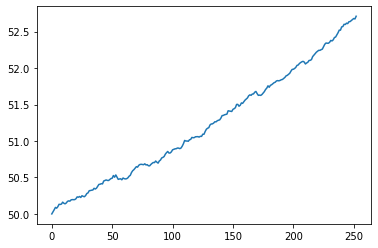

diciton for future stock priceL $52.71


In [ ]:
stock_monte_carlo(50, 0.0002, 0.5, 0.01)